In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [186]:
pnb = pd.read_csv('PNB.csv', parse_dates=["Date"], index_col="Date")

In [187]:
pnb

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-07,182.399994,182.929993,180.149994,180.559998,166.757645,2010250.0
2013-01-08,180.199997,181.589996,177.669998,179.220001,165.520081,4681025.0
2013-01-09,179.270004,181.330002,176.880005,177.600006,164.023911,3162925.0
2013-01-10,179.360001,179.889999,177.039993,177.639999,164.060852,2586635.0
2013-01-11,177.820007,178.690002,175.449997,176.149994,162.684738,1746450.0
...,...,...,...,...,...,...
2021-09-29,38.799999,41.000000,38.500000,39.650002,39.650002,103695312.0
2021-09-30,39.799999,41.250000,39.599998,40.099998,40.099998,83665464.0
2021-10-01,39.950001,41.200001,39.349998,40.599998,40.599998,97922965.0


In [188]:
pnb.isna().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [189]:
pnb = pnb.dropna()

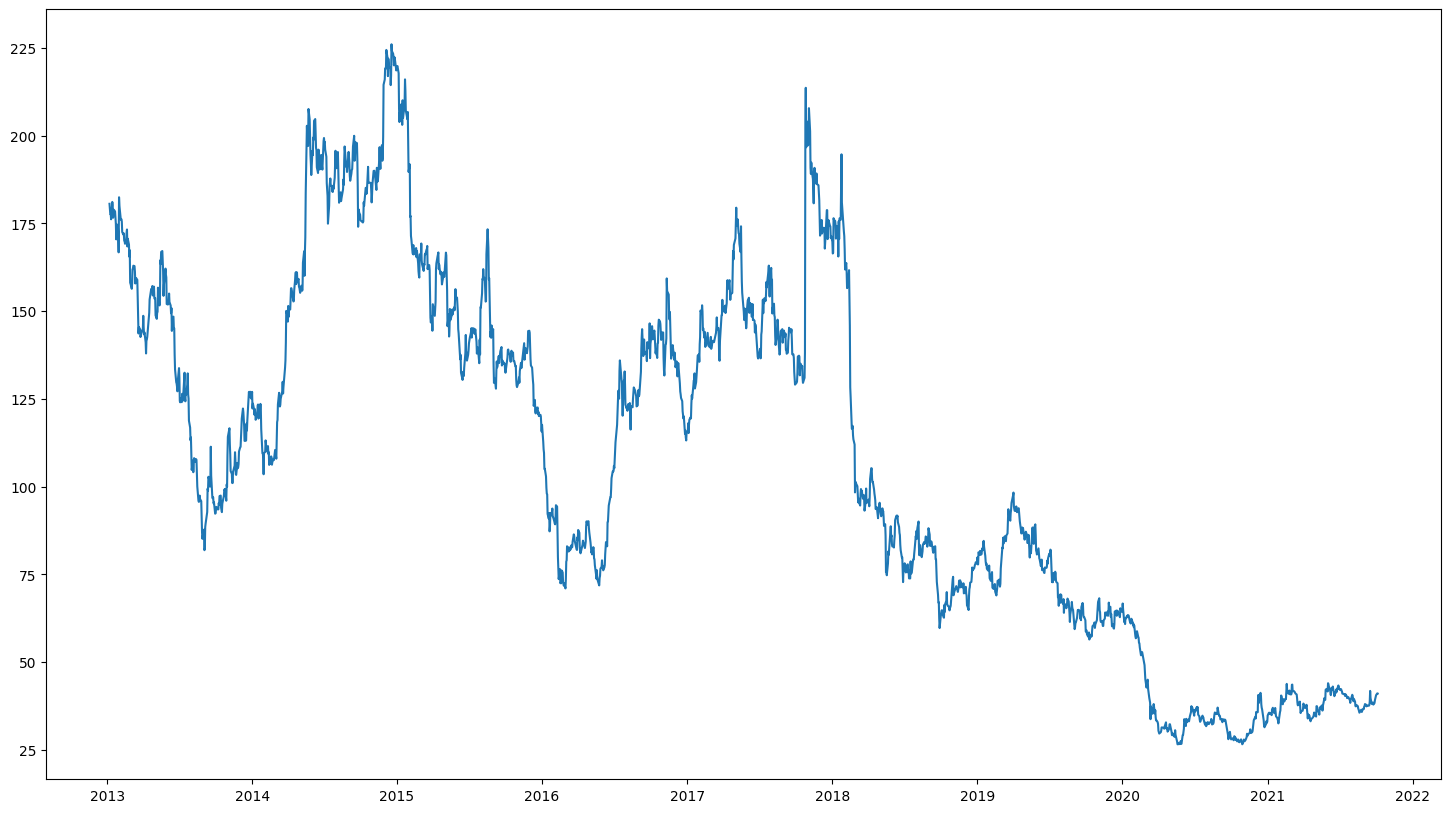

In [190]:
plt.figure(figsize=(18,10))
plt.plot(pnb.Close)
plt.show()

### Lag plot to find patterns

In [191]:
from pandas.plotting import lag_plot
plt.figure(figsize=(18,10))
lag_plot(pnb['Close'], lag=2)
plt.title('Tesla Autocorrelation plot')

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

In [192]:
plt.figure(figsize=(18,10))
lag_plot(pnb['Close'], lag=5)
plt.title('Tesla Autocorrelation plot')

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

In [193]:
pnb_close = pnb[['Close']]
pnb_close

,Close
Date,
2013-01-07,180.559998
2013-01-08,179.220001
2013-01-09,177.600006
2013-01-10,177.639999
2013-01-11,176.149994
...,...
2021-09-29,39.650002
2021-09-30,40.099998
2021-10-01,40.599998


In [194]:
pnb_close['close_prev'] = pnb_close.shift(1)
pnb_close['diff'] = pnb_close['Close'] - pnb_close['close_prev']

pnb_close['diff 5'] = pnb_close['Close'] - pnb_close['Close'].shift(5)

<ipython-input-194-575c638d139d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnb_close['close_prev'] = pnb_close.shift(1)
<ipython-input-194-575c638d139d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnb_close['diff'] = pnb_close['Close'] - pnb_close['close_prev']
<ipython-input-194-575c638d139d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

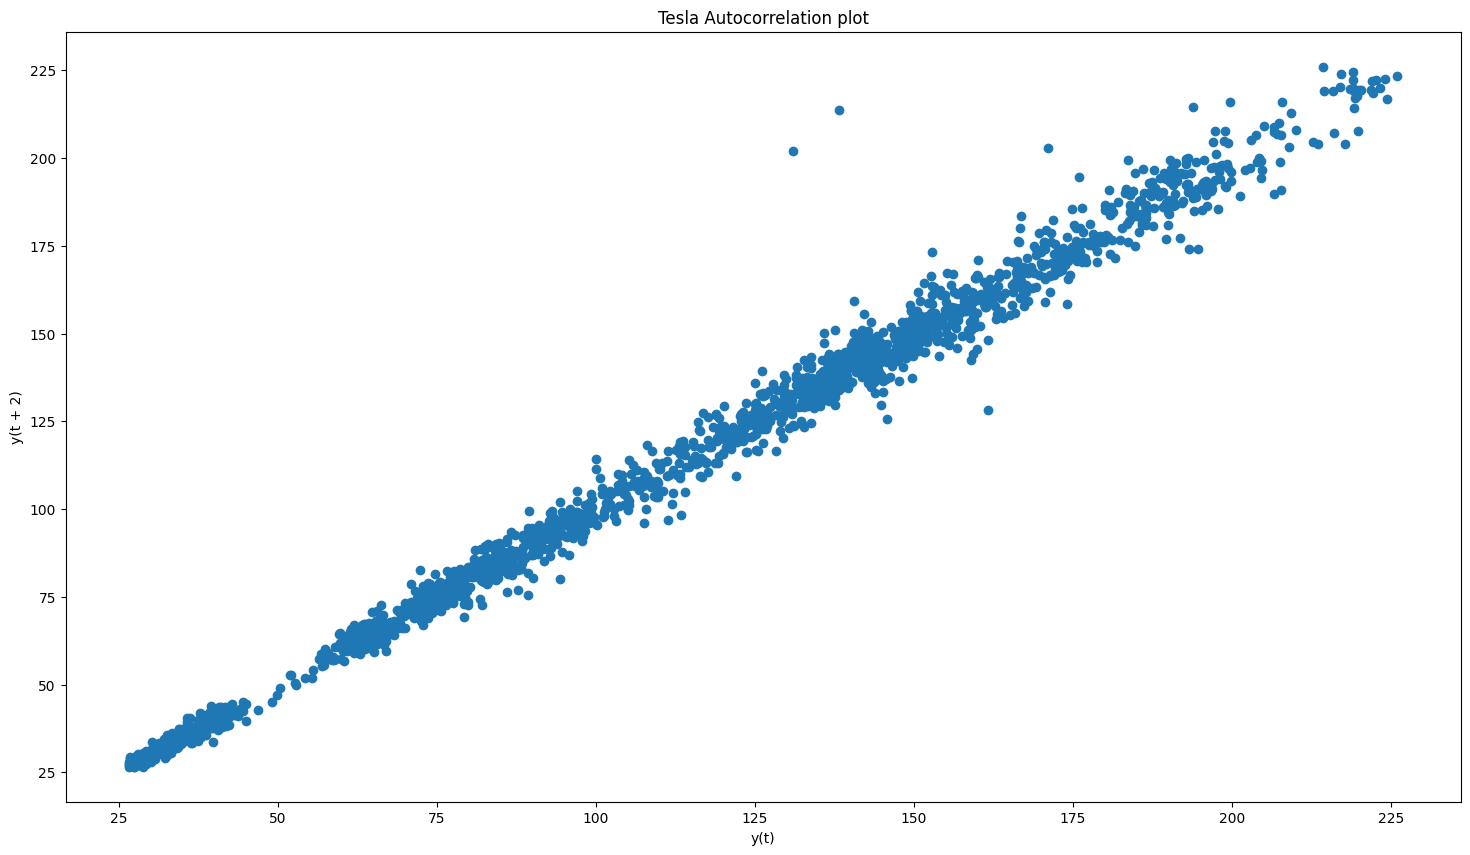

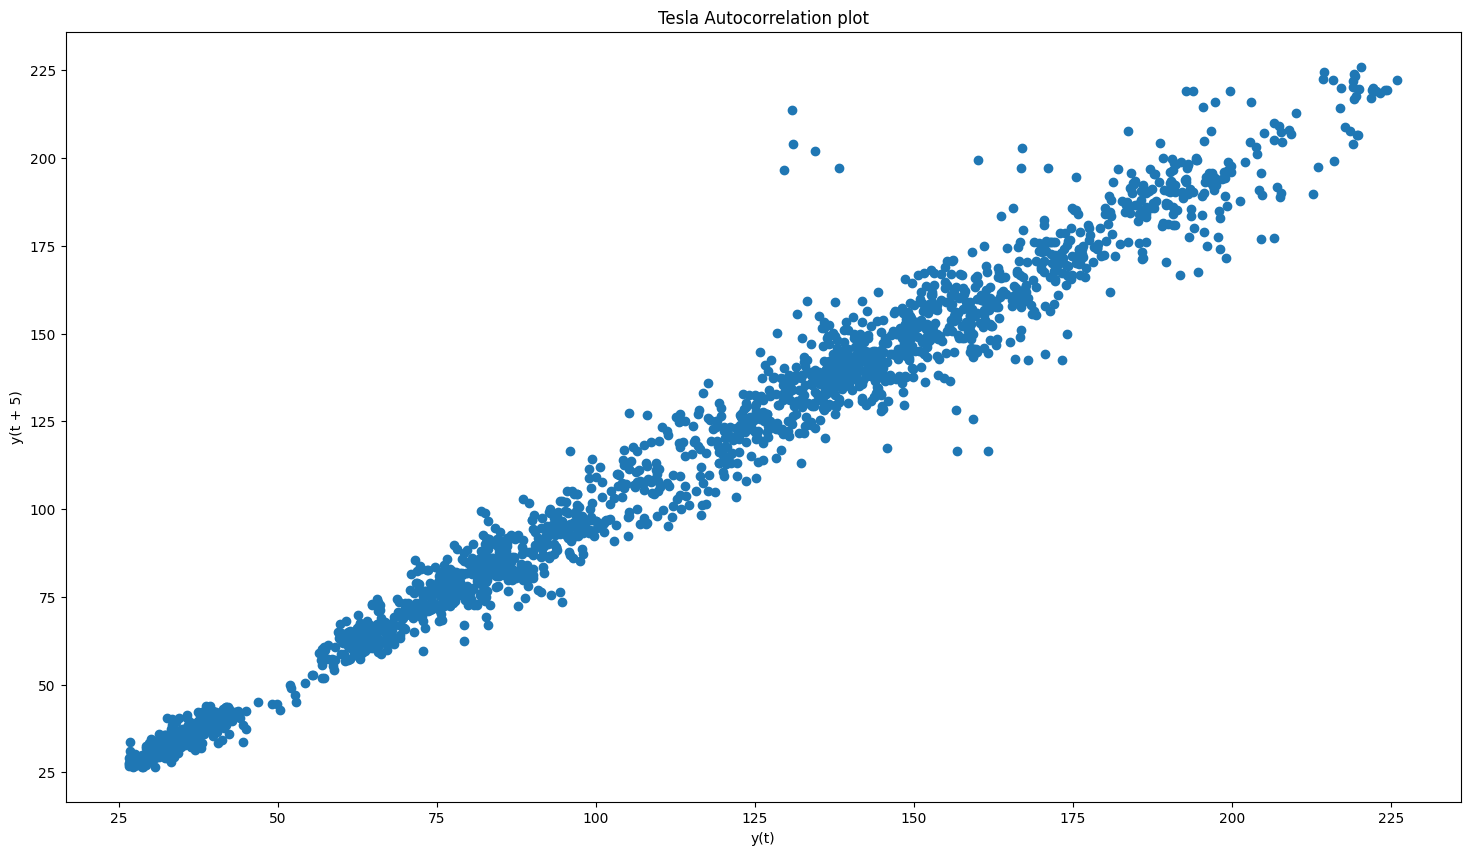

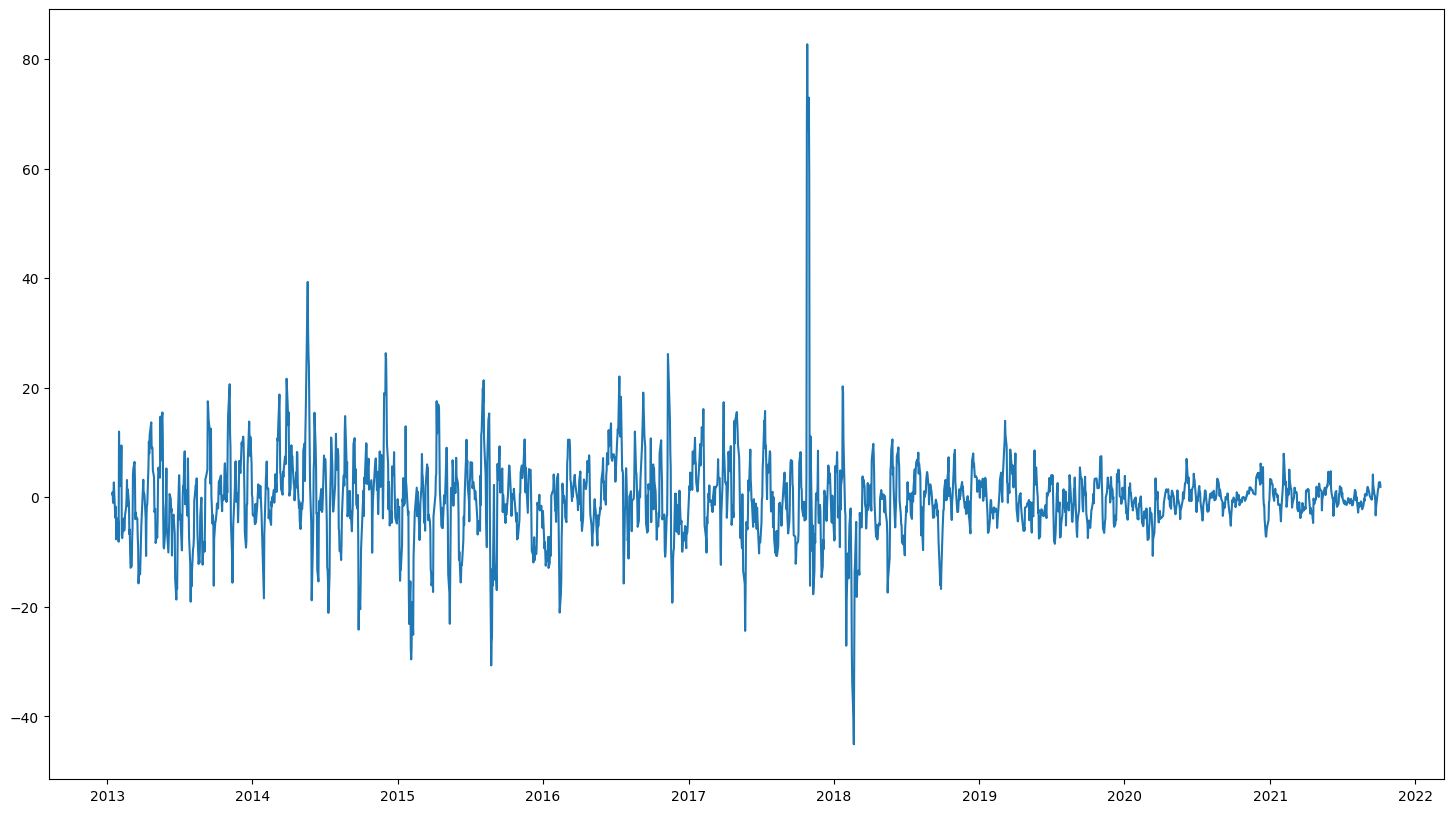

In [195]:
plt.figure(figsize=(18,10))
plt.plot(pnb_close['diff 5'])
plt.show()

In [196]:
print("For one Day diff")
print('Mean of Change',pnb_close['diff'].mean())
print('Variance of Change', pnb_close['diff'].var())
print('Standard of Change', pnb_close['diff'].std())
print('')
print("For five Days diff")
print('Mean of Change',pnb_close['diff 5'].mean())
print('Variance of Change', pnb_close['diff 5'].var())
print('Standard of Change', pnb_close['diff 5'].std())

For one Day diff
Mean of Change -0.06479795587552252
Variance of Change 10.954663468107029
Standard of Change 3.3097829941110986

For five Days diff
Mean of Change -0.32046068078175893
Variance of Change 59.657918793924
Standard of Change 7.723853882222527


### Moving Average

In [197]:
pnb_close['MV'] = pnb_close['Close'].rolling(5).mean()

pnb_close[['Close','MV']][2000:].plot(figsize=(20,10))
#plt.show()

<ipython-input-197-5c05a78e33a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnb_close['MV'] = pnb_close['Close'].rolling(5).mean()


<AxesSubplot:xlabel='Date'>

# Trend Analysis
## Linear Regression

In [198]:
from sklearn.linear_model import LinearRegression

coefficient of determination: 0.5969920504430908
slope: [[-0.06413501]]


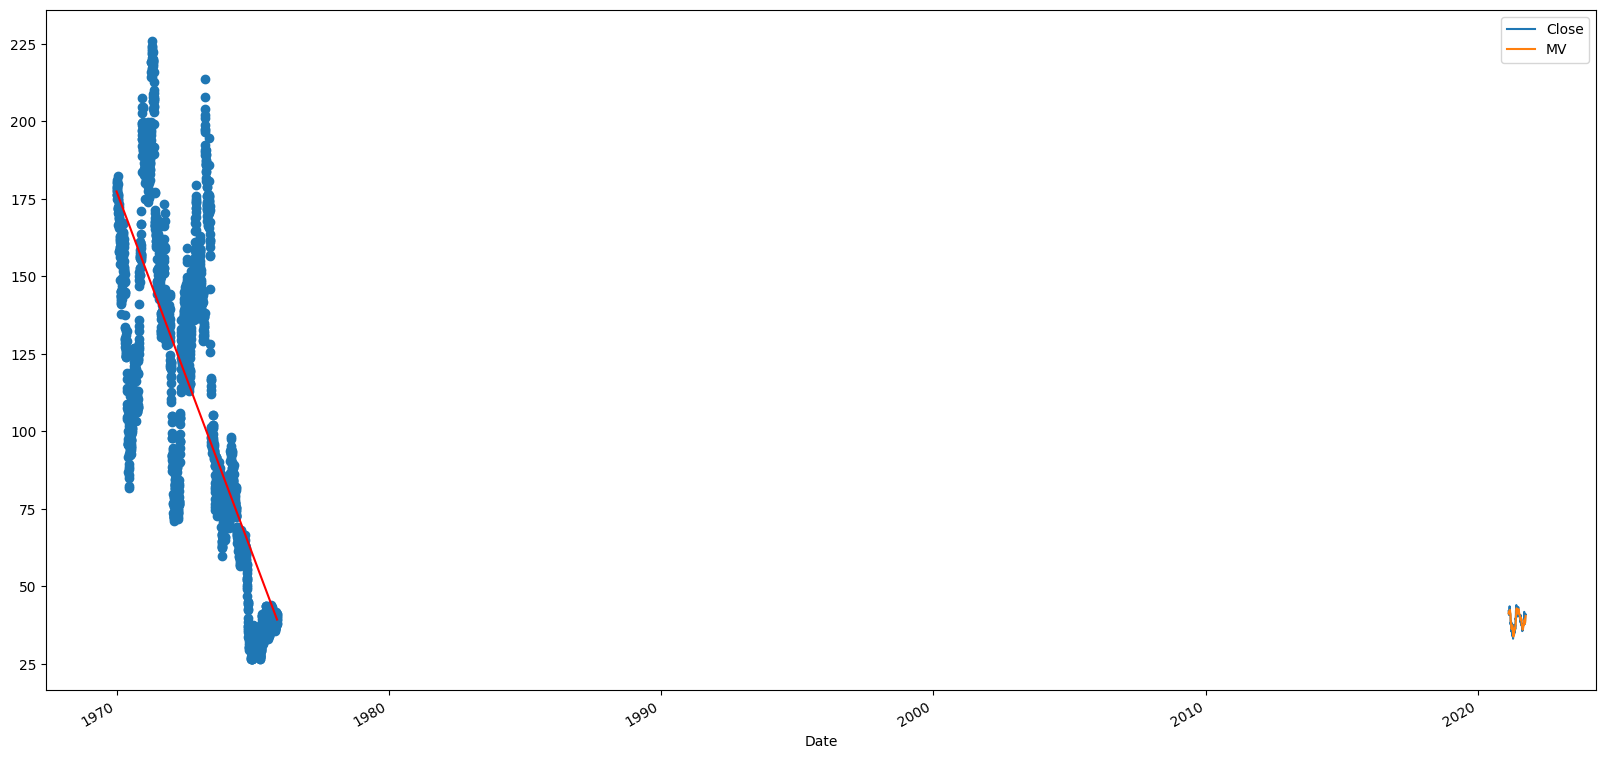

In [199]:
y = pnb.Close.tolist()
x = [*range(pnb.shape[0])] 
x, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

model = LinearRegression()
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)
print('slope:', model.coef_)

pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, pred, color='red')
plt.show()

#### Trend Analysis by year

coefficient of determination: 0.751798931103221
slope: [[-0.35188376]]
2013


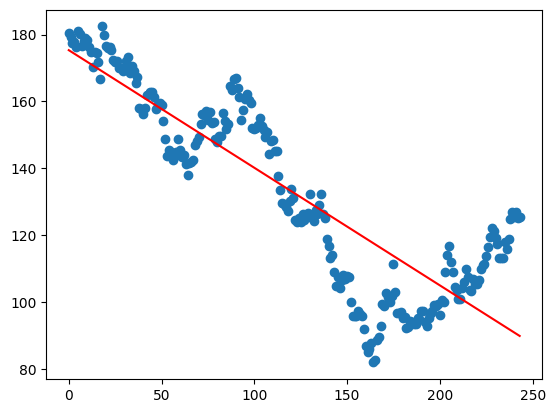

coefficient of determination: 0.752171621833133
slope: [[0.42577727]]
2014


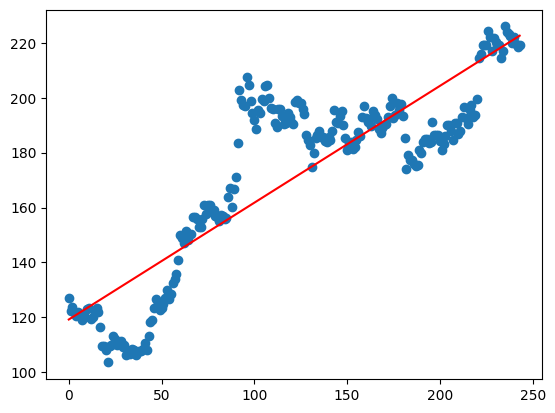

coefficient of determination: 0.6623492027211255
slope: [[-0.2531328]]
2015


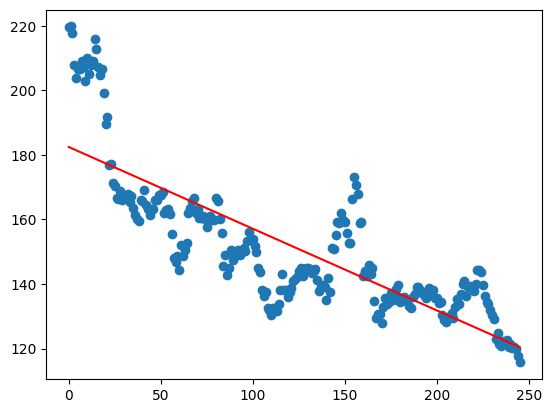

coefficient of determination: 0.6455671575199092
slope: [[0.28885692]]
2016


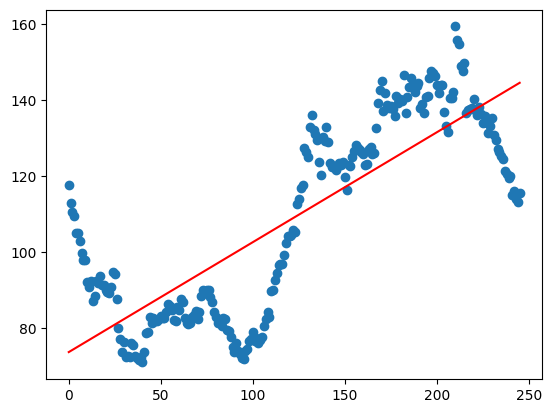

coefficient of determination: 0.2964468068353152
slope: [[0.14556944]]
2017


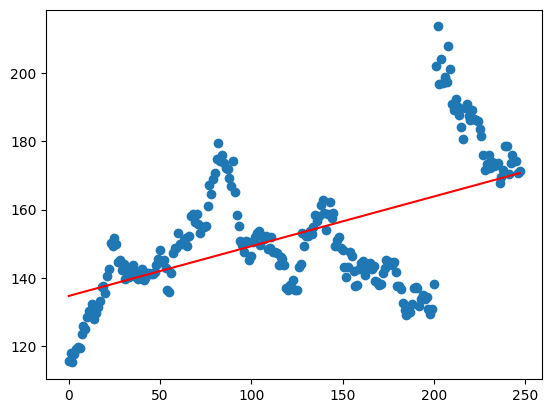

coefficient of determination: 0.6247874168489667
slope: [[-0.34976769]]
2018


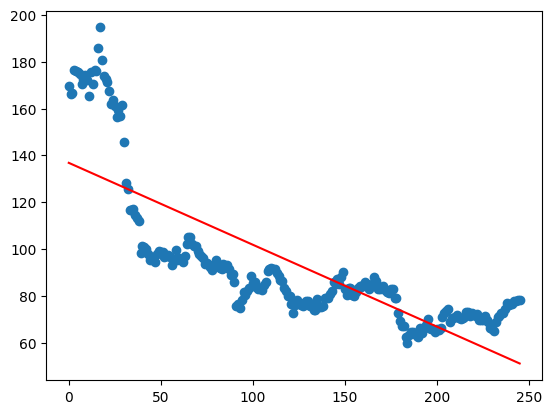

coefficient of determination: 0.5648868767769999
slope: [[-0.11336209]]
2019


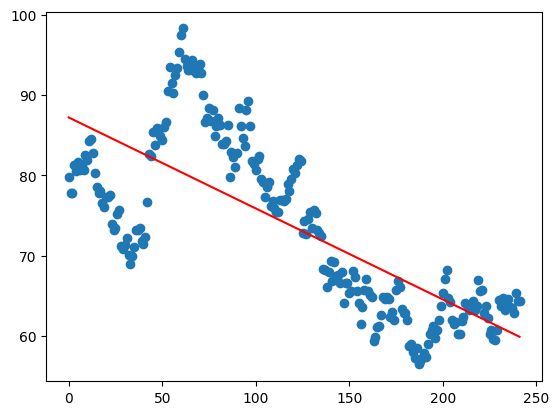

coefficient of determination: 0.4264025021052288
slope: [[-0.09472226]]
2020


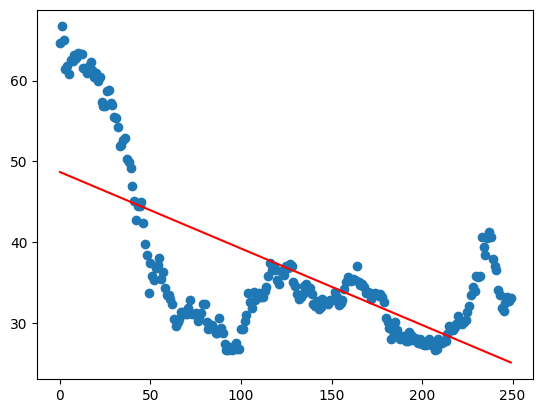

coefficient of determination: 0.05149396064227052
slope: [[0.01122561]]
2021


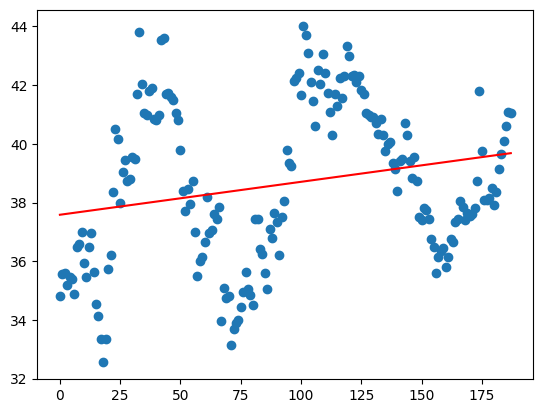

In [200]:
year = pnb.index.year.unique()
for i in year:
    y = pnb.Close[pnb.index.year == i].tolist()
    x = [*range(len(y))] 
    x, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

    model = LinearRegression()
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)

    print('coefficient of determination:', r_sq)
    print('slope:', model.coef_)

    pred = model.predict(x)
    print(i)
    plt.scatter(x, y)
    plt.plot(x, pred, color='red')
    plt.show()

## Polynomial Regression

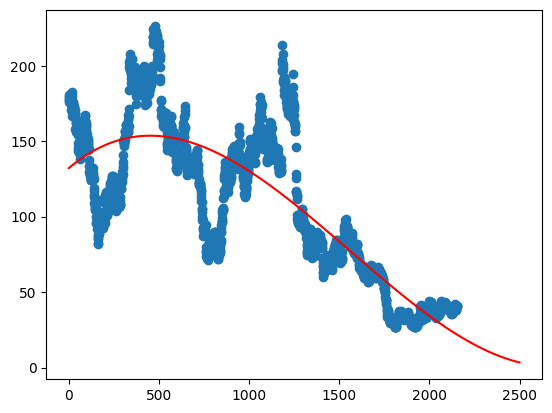

In [201]:
y = pnb.Close.tolist()
x = [*range(len(y))] 
x, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

mymodel = np.poly1d(np.polyfit(x.reshape(-1), y.reshape(-1), 3))
myline = np.linspace(1, 2500, 100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline),color='red')
plt.show()

#### Trend Analysis by year

2013


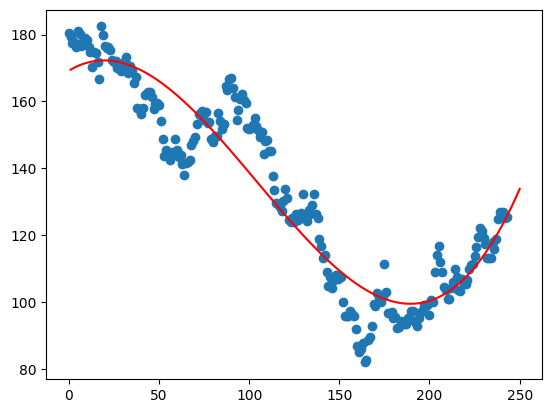

2014


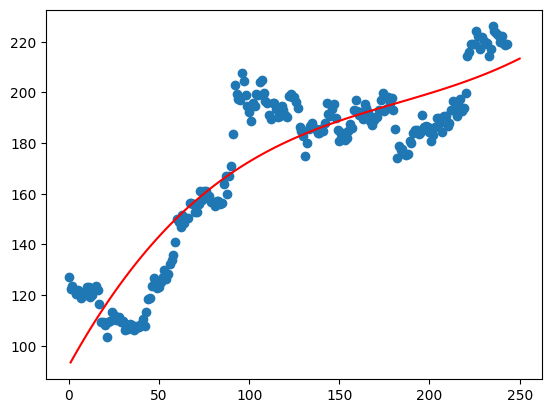

2015


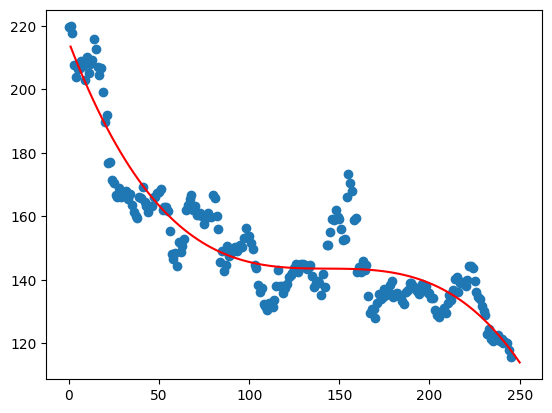

2016


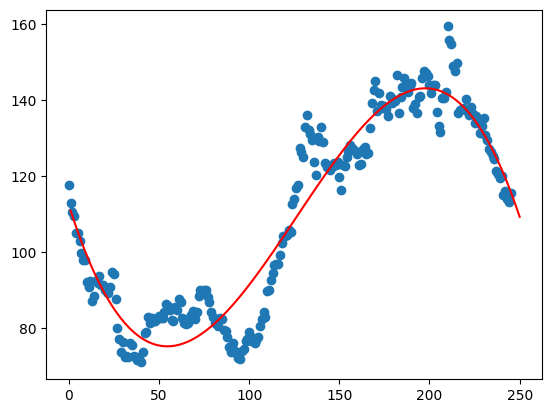

2017


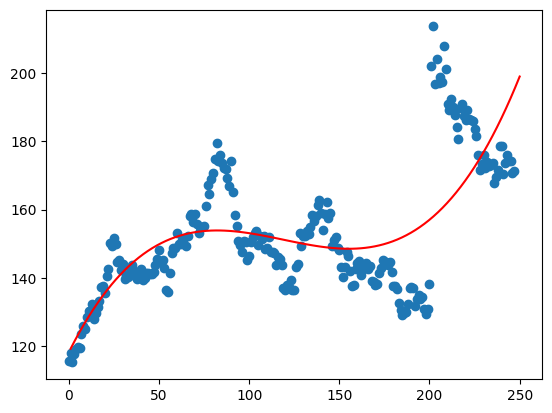

2018


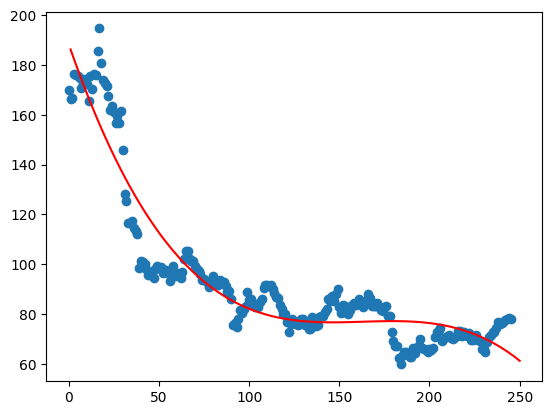

2019


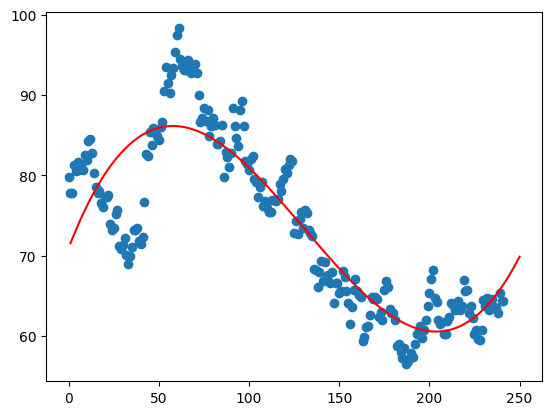

2020


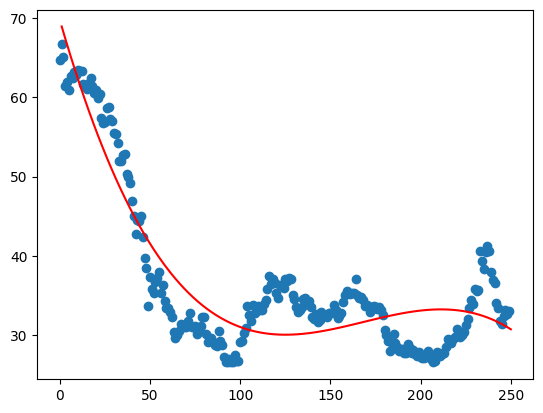

2021


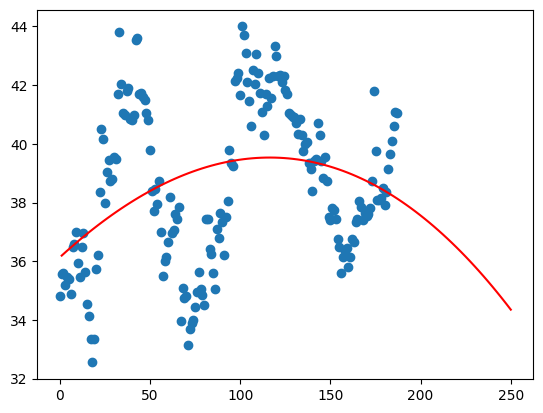

In [202]:
for i in year:
    y = pnb.Close[pnb.index.year == i].tolist()
    x = [*range(len(y))] 
    x, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)
    
    mymodel = np.poly1d(np.polyfit(x.reshape(-1), y.reshape(-1), 3))
    myline = np.linspace(1, 250, 100)
    print(i)
    plt.scatter(x, y)
    plt.plot(myline, mymodel(myline),color='red')
    plt.show()

## verify the stationarity of the dataset

In [203]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(pnb.Close)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]),'\n')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -1.6148122324576886
p-value: 0.4754500716236879 

Critial Values:
   1%, -3.4333923407704177
Critial Values:
   5%, -2.8628839944786275
Critial Values:
   10%, -2.567485476439311


We can see that the p value is higher than 0.05 so we cannot reject the null hypothesis.
We can say that the series is non stationary.

In [204]:
pnb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2154 entries, 2013-01-07 to 2021-10-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2154 non-null   float64
 1   High       2154 non-null   float64
 2   Low        2154 non-null   float64
 3   Close      2154 non-null   float64
 4   Adj Close  2154 non-null   float64
 5   Volume     2154 non-null   float64
dtypes: float64(6)
memory usage: 117.8 KB


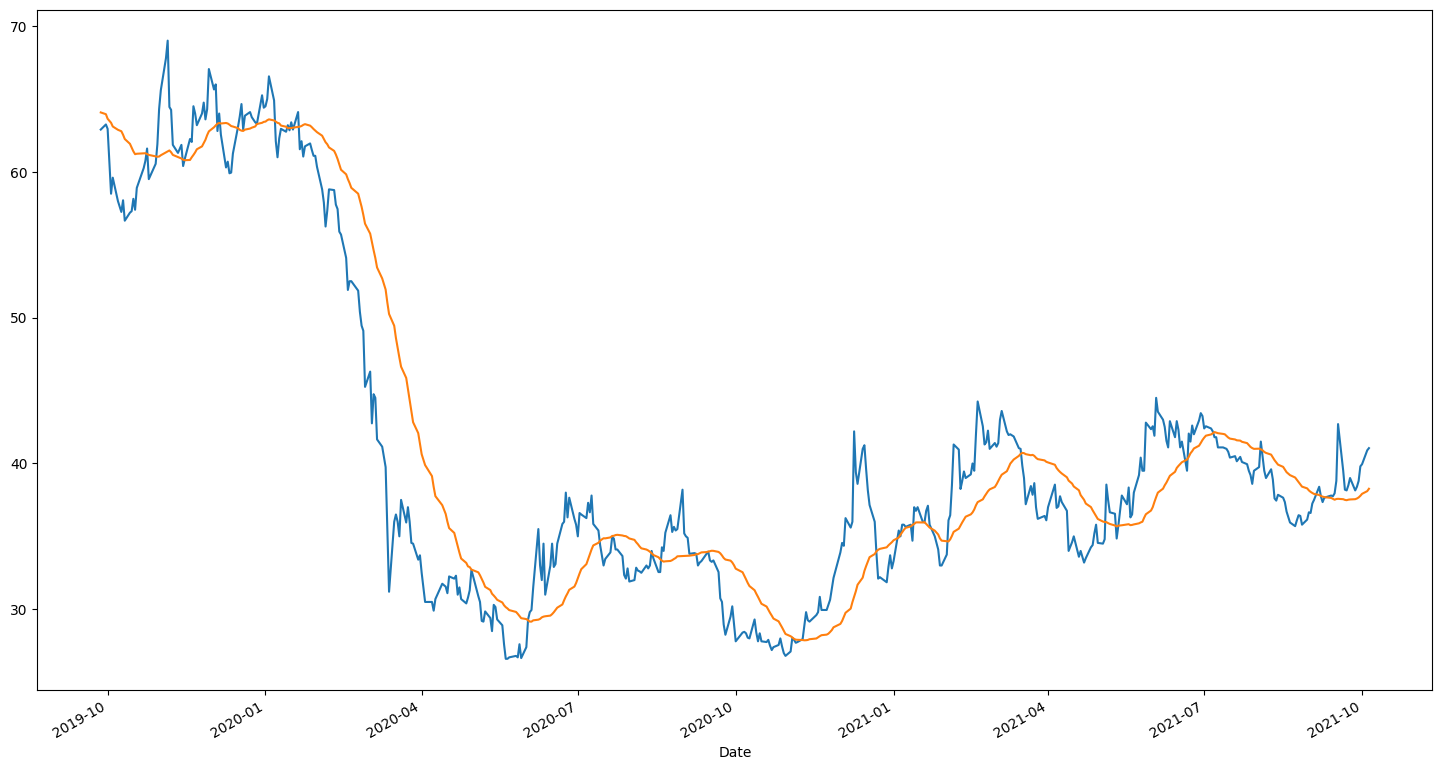

In [205]:
#moving average
pnb['Open'][-500:].plot(figsize=(18,10))
pnb.rolling(window=30).mean()['Close'][-500:].plot(figsize=(18,10))
plt.show()

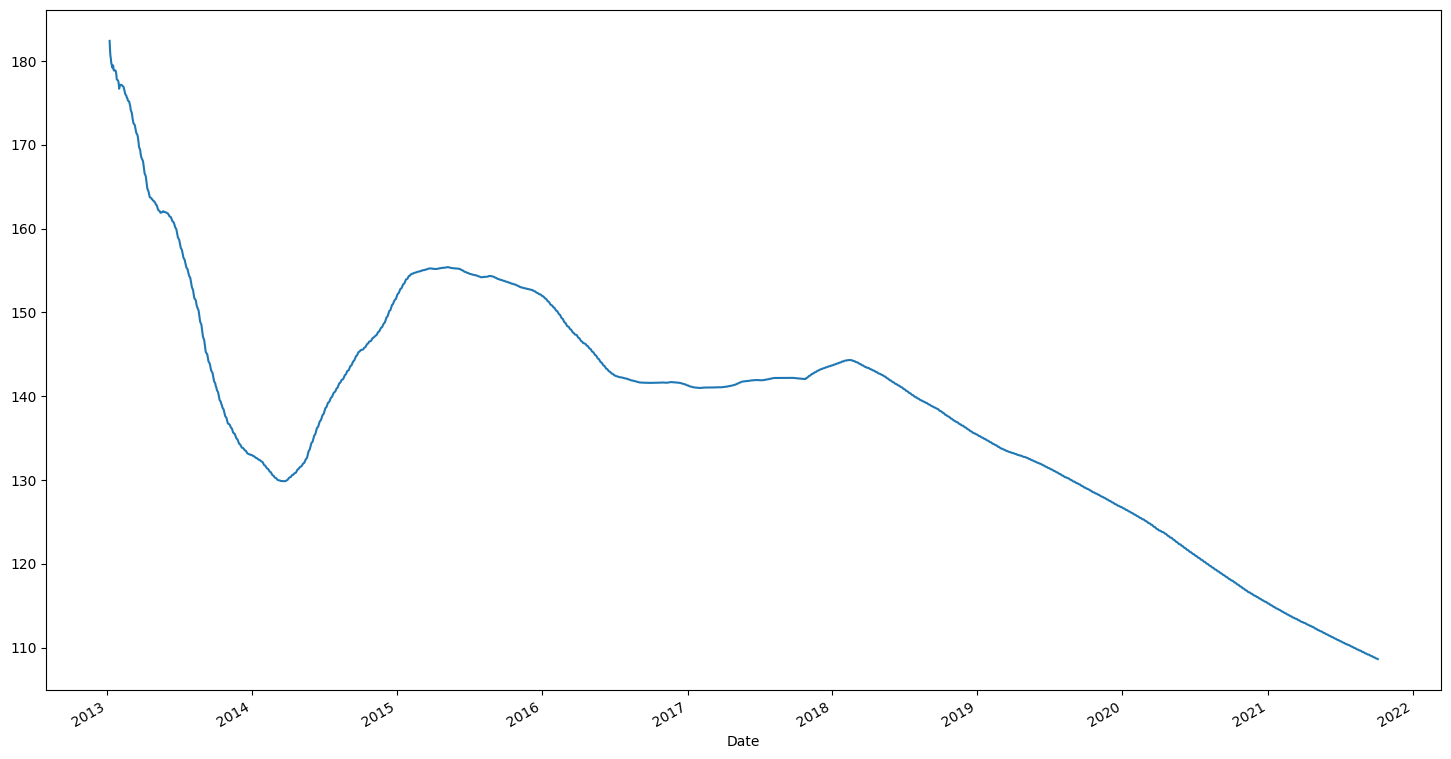

In [206]:
pnb.Open.expanding(min_periods=1).mean().plot(figsize=(18,10))
plt.show()

## Data processing

In [207]:
training_set = pd.DataFrame(pnb.Open)
training_set.head(4)

,Open
Date,
2013-01-07,182.399994
2013-01-08,180.199997
2013-01-09,179.270004
2013-01-10,179.360001


In [208]:
# dividing into train and test data
from sklearn.model_selection import train_test_split

train = training_set[:-200]
test = training_set[-200:]

In [209]:
# scaling the data

from sklearn.preprocessing import MinMaxScaler

def scale(train, test):
    scaler = MinMaxScaler()
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)
    return scaler,train,test

In [210]:
#creating data struture with 60 timesteps and 1 output

def data_structure(data):
    x = []
    y = []
    for i in range(60,len(data)):
        x.append(data[i-60:i,0])
        y.append(data[i,0])
    
    x, y = np.array(x), np.array(y)

    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x,y

In [211]:
scaler, train, test = scale(train, test)

In [212]:
x_train, y_train = data_structure(train)
x_test, y_test = data_structure(test)

## Model creation

In [213]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [214]:
regressor = Sequential()

In [215]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [216]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
ES = EarlyStopping(monitor="val_loss", patience=3, verbose=1)
regressor.fit(x=x_train, y=y_train, epochs=100, batch_size=32, verbose=2, callbacks=ES, validation_split=0.1)   

Epoch 1/100
54/54 - 14s - loss: 0.0237 - val_loss: 0.0023
Epoch 2/100
54/54 - 6s - loss: 0.0065 - val_loss: 0.0016
Epoch 3/100
54/54 - 6s - loss: 0.0057 - val_loss: 7.7039e-04
Epoch 4/100
54/54 - 6s - loss: 0.0051 - val_loss: 4.0545e-04
Epoch 5/100
54/54 - 6s - loss: 0.0050 - val_loss: 3.5583e-04
Epoch 6/100
54/54 - 6s - loss: 0.0047 - val_loss: 2.9677e-04
Epoch 7/100
54/54 - 6s - loss: 0.0043 - val_loss: 2.2636e-04
Epoch 8/100
54/54 - 6s - loss: 0.0042 - val_loss: 2.2349e-04
Epoch 9/100
54/54 - 7s - loss: 0.0038 - val_loss: 2.2837e-04
Epoch 10/100
54/54 - 7s - loss: 0.0039 - val_loss: 3.3278e-04
Epoch 11/100
54/54 - 7s - loss: 0.0036 - val_loss: 2.5226e-04
Epoch 00011: early stopping


In [237]:
test_pred = regressor.predict(x_test)
test_pred = scaler.inverse_transform(test_pred)

In [238]:
test_data = scaler.inverse_transform(np.reshape(y_test,(140,1)))

In [239]:
test_pred = pd.DataFrame(test_pred, columns=['price'])
test_data = pd.DataFrame(test_data, columns=['price'])

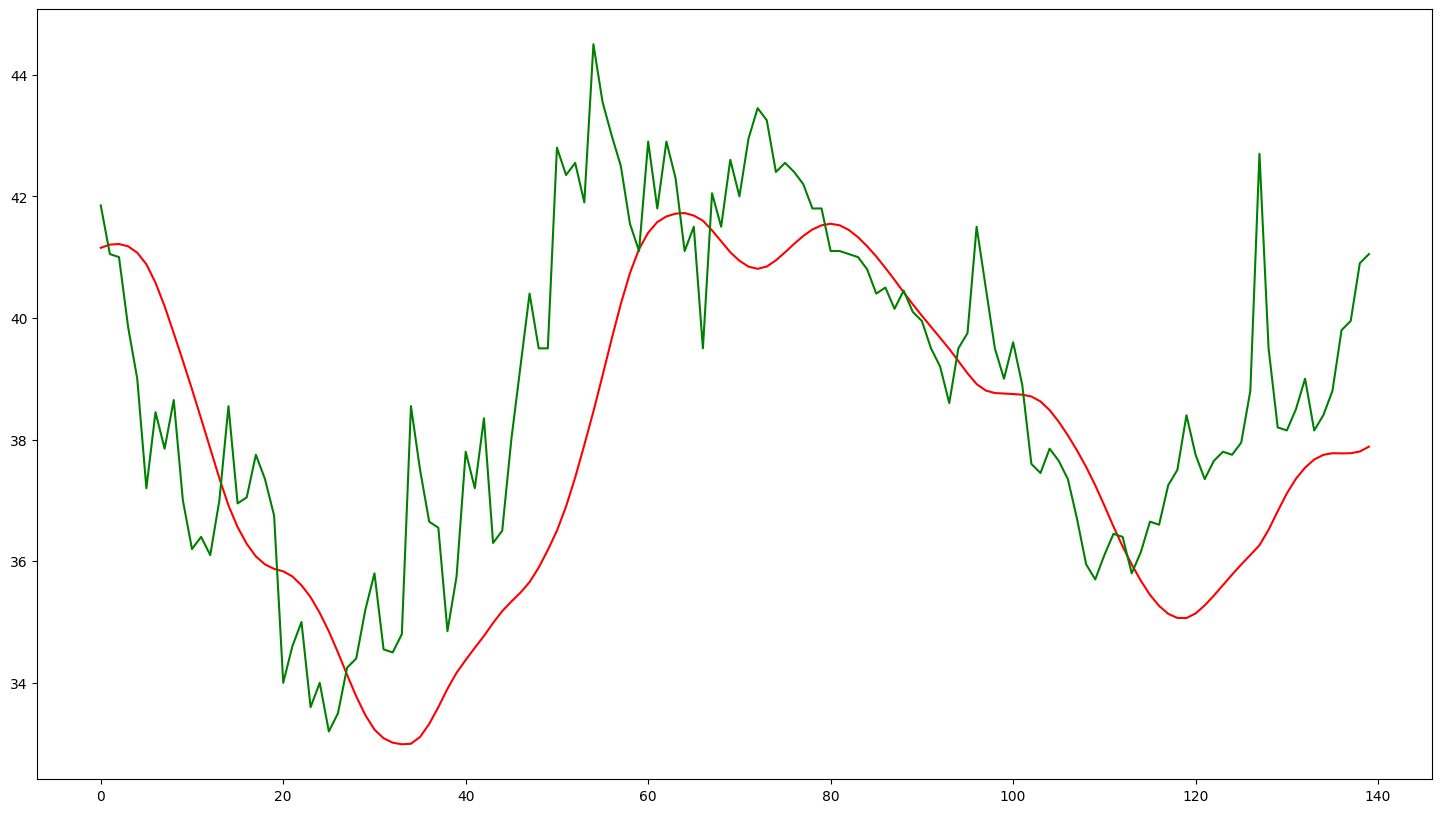

In [243]:
## Visualizing the real test output and predicted test output
plt.figure(figsize=(18,10))
plt.plot(test_pred, color='red', label="predicted price")
plt.plot(test_data, color='green', label="actual price")

plt.show()

In [247]:
# Mean sqaure error
np.square(test_data - test_pred).mean()

price    4.723246
dtype: float64